In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

step0: 
carico dataset e definizione del tipo di problema(classification o regression? -- chi è la target?)

In [7]:
df = pd.read_csv('audit.csv')
df

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,2,0.40,2,0.89,5.0,2,0.00,2,2,0,2,0,2,2.0,0
772,55.57,16,0.47,2,0.37,2,0.84,5.0,2,0.00,2,2,0,2,0,2,2.0,0
773,55.57,14,0.24,2,0.04,2,0.28,5.0,2,0.00,2,2,0,2,0,2,2.0,0
774,55.57,18,0.20,2,0.00,2,0.20,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sector_score,776.0,20.184536,24.319017,1.85,2.3700,3.890,55.5700,59.85
PARA_A,776.0,2.450194,5.678870,0.00,0.2100,0.875,2.4800,85.00
SCORE_A,776.0,3.512887,1.740549,2.00,2.0000,2.000,6.0000,6.00
PARA_B,776.0,10.799988,50.083624,0.00,0.0000,0.405,4.1600,1264.63
SCORE_B,776.0,3.131443,1.698042,2.00,2.0000,2.000,4.0000,6.00
TOTAL,776.0,13.218481,51.312829,0.00,0.5375,1.370,7.7075,1268.91
numbers,776.0,5.067655,0.264449,5.00,5.0000,5.000,5.0000,9.00
Marks,776.0,2.237113,0.803517,2.00,2.0000,2.000,2.0000,6.00
Money_Value,775.0,14.137631,66.606519,0.00,0.0000,0.090,5.5950,935.03
MONEY_Marks,776.0,2.909794,1.597452,2.00,2.0000,2.000,4.0000,6.00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    object 
 2   PARA_A         776 non-null    float64
 3   SCORE_A        776 non-null    int64  
 4   PARA_B         776 non-null    float64
 5   SCORE_B        776 non-null    int64  
 6   TOTAL          776 non-null    float64
 7   numbers        776 non-null    float64
 8   Marks          776 non-null    int64  
 9   Money_Value    775 non-null    float64
 10  MONEY_Marks    776 non-null    int64  
 11  District       776 non-null    int64  
 12  Loss           776 non-null    int64  
 13  LOSS_SCORE     776 non-null    int64  
 14  History        776 non-null    int64  
 15  History_score  776 non-null    int64  
 16  Score          776 non-null    float64
 17  Risk           776 non-null    int64  
dtypes: float64

In [10]:
df.isnull().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [11]:
df['Risk'].value_counts()

1    486
0    290
Name: Risk, dtype: int64

0 --> No Risk

1 --> Risk


In [12]:
df.groupby('Risk').mean()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score
Risk,,,,,,,,,,,,,,,,
0,31.969793,0.301793,2.000000,0.251038,2.000000,0.552831,5.000000,2.000000,0.264754,2.000000,2.000000,0.000000,2.000000,0.000000,2.00000,2.000000
1,13.152181,3.732162,4.415638,17.094630,3.806584,20.776174,5.108025,2.378601,22.387140,3.452675,2.806584,0.047325,2.098765,0.166667,2.26749,3.121811


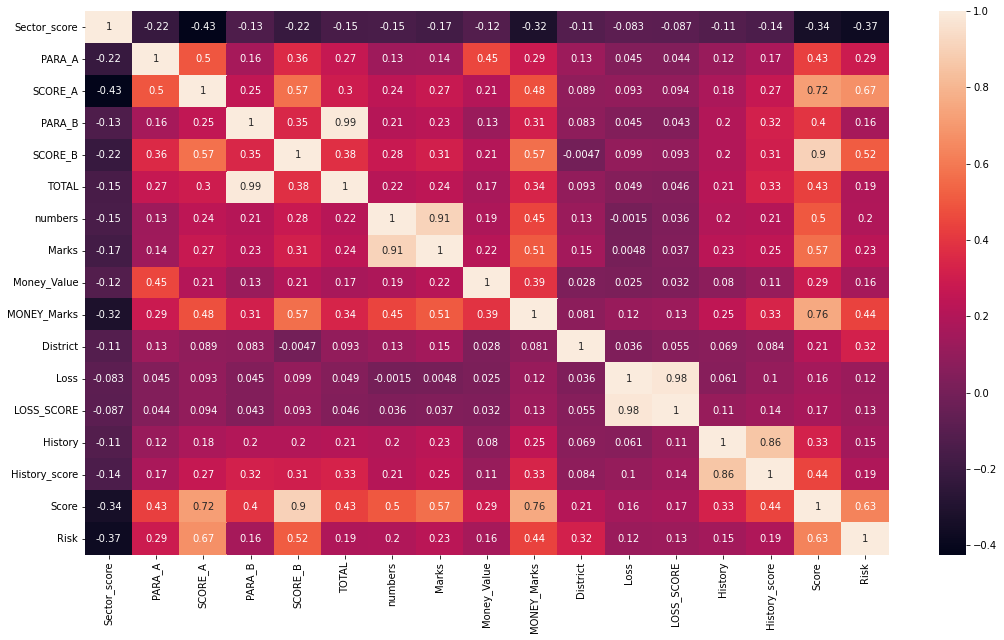

In [13]:
import seaborn as sns

plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
sns.pairplot(df,hue='Risk');

In [14]:
df = df.dropna()

In [19]:
# separating the data and labels
X = df.drop(['Risk','LOCATION_ID'], axis=1)
y = df['Risk']

Train Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state=667
                                                    )

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(775, 16) (620, 16) (155, 16)


Training the Model:

RANDOM FOREST CLASSIFIER

In [22]:
classifier = RandomForestClassifier()

In [23]:
#training the classifier
classifier.fit(X_train, y_train)

RandomForestClassifier()

Model Evaluation

In [24]:
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)

In [25]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  1.0


In [27]:
labels = ['No Risk', 'Risk']

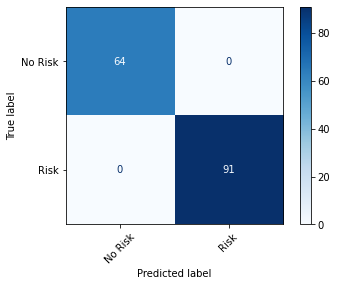

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

#labels = ['class1', 'class2']
cm = ConfusionMatrixDisplay.from_estimator(classifier, 
                                      X_test, 
                                      y_test,
                                      cmap='Blues',
                                      display_labels=labels,
                                      xticks_rotation=45,
                                      )
cm;

In [30]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

     No Risk       1.00      1.00      1.00        64
        Risk       1.00      1.00      1.00        91

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155



#ROC CURVES

In [31]:
!pip install plot-metric --quiet

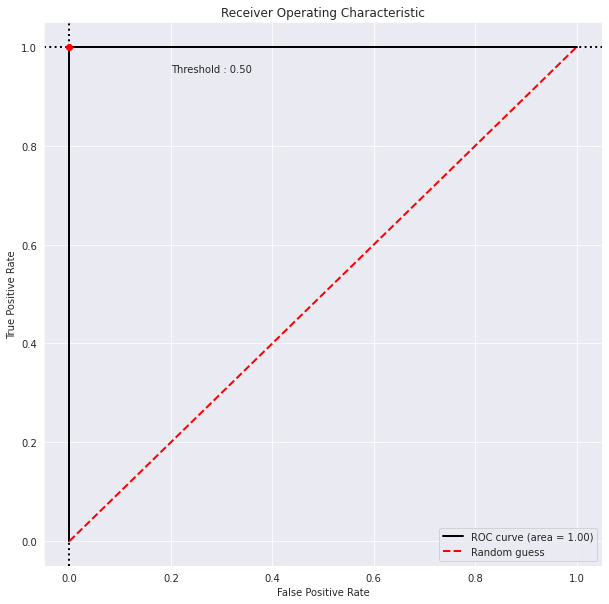

In [32]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

#P-R Curves

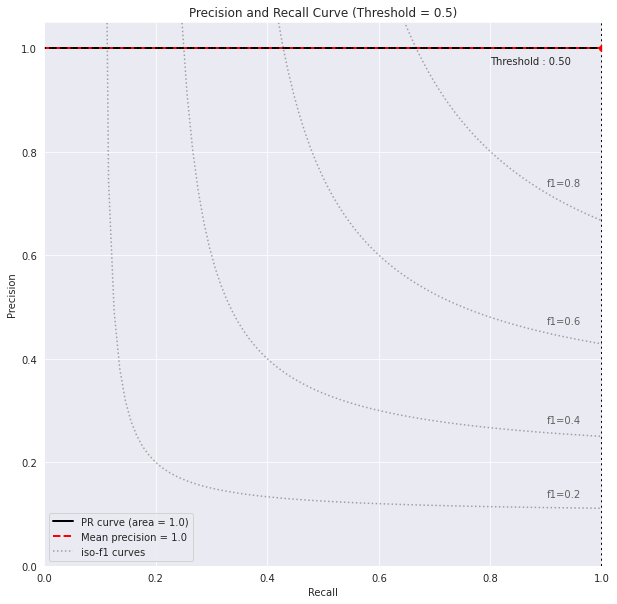

In [33]:
# Figures
plt.figure(figsize=(10,10))
bc.plot_precision_recall_curve();

Training the Model DecisionTree

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
classifier = DecisionTreeClassifier()

In [38]:
#training the classifier
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

Model Evaluation

In [39]:
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)

In [40]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  1.0


In [41]:
labels = ['No Risk', 'Risk']

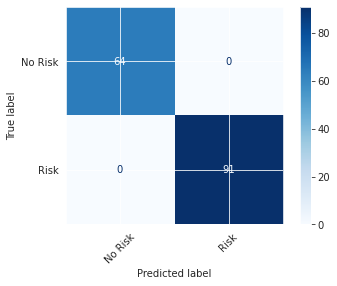

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

#labels = ['class1', 'class2']
cm = ConfusionMatrixDisplay.from_estimator(classifier, 
                                      X_test, 
                                      y_test,
                                      cmap='Blues',
                                      display_labels=labels,
                                      xticks_rotation=45,
                                      )
cm;

In [44]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

     No Risk       1.00      1.00      1.00        64
        Risk       1.00      1.00      1.00        91

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155



#ROC Curves

In [45]:
!pip install plot-metric --quiet

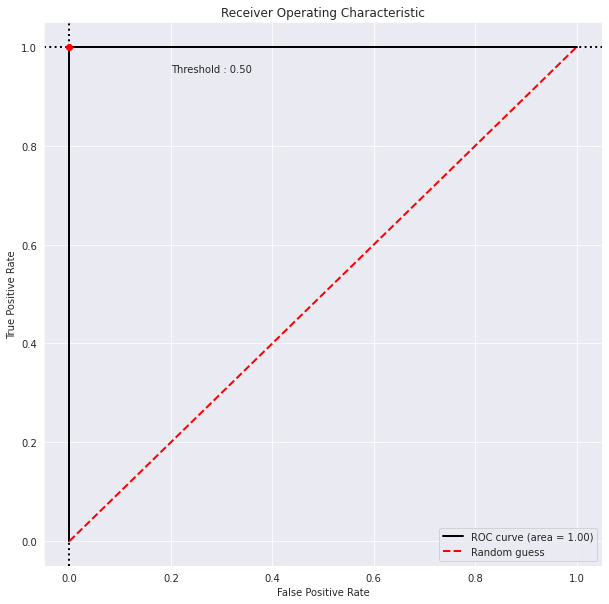

In [46]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

#P-R Curves

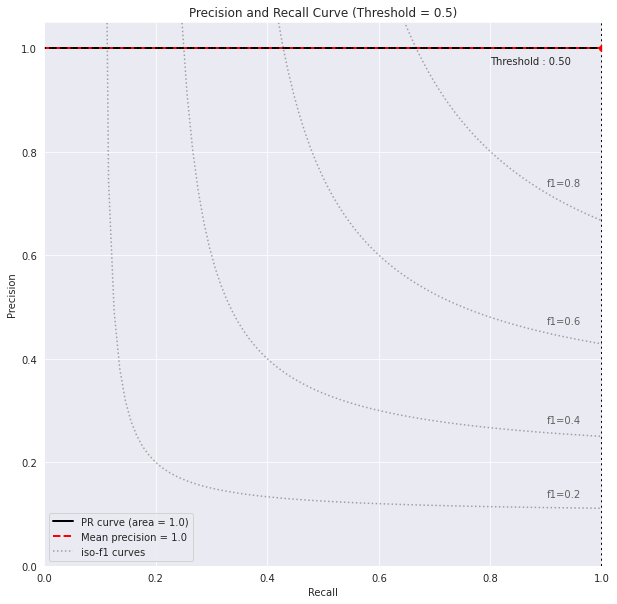

In [47]:
# Figures
plt.figure(figsize=(10,10))
bc.plot_precision_recall_curve();

#Training the Model KNeighborsClassifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier

Data Standardization

In [68]:
sc = StandardScaler()
standardized_data = sc.fit_transform(X_)
print(standardized_data)

[[-0.66907089  0.30412945  1.4285004  ... -0.19682237 -0.24673663
  -0.35348365]
 [-0.66907089 -0.43200512 -0.87074739 ... -0.19682237 -0.24673663
  -0.81938472]
 [-0.66907089 -0.34218966 -0.87074739 ... -0.19682237 -0.24673663
  -0.81938472]
 ...
 [ 1.45892742 -0.38973902 -0.87074739 ... -0.19682237 -0.24673663
  -0.81938472]
 [ 1.45892742 -0.39678337 -0.87074739 ... -0.19682237 -0.24673663
  -0.81938472]
 [ 1.45892742 -0.43200512 -0.87074739 ... -0.19682237 -0.24673663
  -0.81938472]]


In [69]:
X = standardized_data
y = df['Risk']

In [70]:
print(X)
print(y)

[[-0.66907089  0.30412945  1.4285004  ... -0.19682237 -0.24673663
  -0.35348365]
 [-0.66907089 -0.43200512 -0.87074739 ... -0.19682237 -0.24673663
  -0.81938472]
 [-0.66907089 -0.34218966 -0.87074739 ... -0.19682237 -0.24673663
  -0.81938472]
 ...
 [ 1.45892742 -0.38973902 -0.87074739 ... -0.19682237 -0.24673663
  -0.81938472]
 [ 1.45892742 -0.39678337 -0.87074739 ... -0.19682237 -0.24673663
  -0.81938472]
 [ 1.45892742 -0.43200512 -0.87074739 ... -0.19682237 -0.24673663
  -0.81938472]]
0      1
1      0
2      0
3      1
4      0
      ..
771    0
772    0
773    0
774    0
775    0
Name: Risk, Length: 775, dtype: int64


Train Test Split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state=667
                                                    )

In [72]:
print(X.shape, X_train.shape, X_test.shape)

(775, 16) (620, 16) (155, 16)


Training the Model

In [73]:
classifier = KNeighborsClassifier()

In [74]:
#training the classifier
classifier.fit(X_train, y_train)

KNeighborsClassifier()

Model Evaluation

In [75]:
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)

In [76]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9935483870967742


In [77]:
labels = ['No Risk', 'Risk']

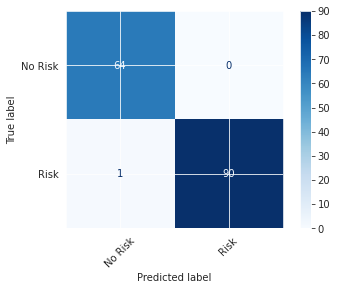

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay

#labels = ['class1', 'class2']
cm = ConfusionMatrixDisplay.from_estimator(classifier, 
                                      X_test, 
                                      y_test,
                                      cmap='Blues',
                                      display_labels=labels,
                                      xticks_rotation=45,
                                      )
cm;

In [79]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

     No Risk       0.98      1.00      0.99        64
        Risk       1.00      0.99      0.99        91

    accuracy                           0.99       155
   macro avg       0.99      0.99      0.99       155
weighted avg       0.99      0.99      0.99       155



#ROC Curves

In [80]:
!pip install plot-metric --quiet

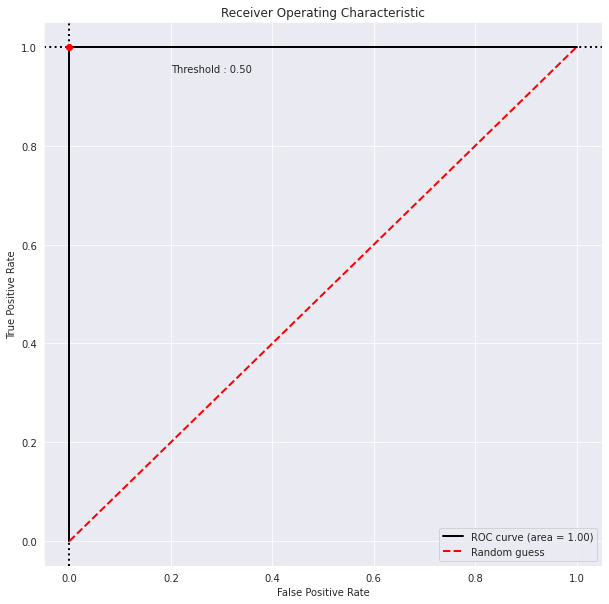

In [81]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

#P-R Curves

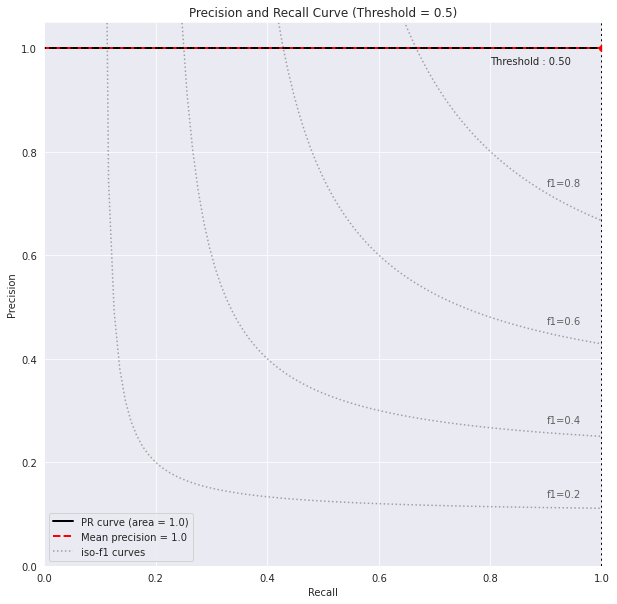

In [82]:
# Figures
plt.figure(figsize=(10,10))
bc.plot_precision_recall_curve();

##Making a Predictive System + Normalization

In [83]:
input_data = [3.89,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4]

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = sc.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction[0])

if (prediction[0] == 0):
  print('No risk')
else:
  print('Risk')

[[-0.66907089  0.30412945  1.4285004  -0.16600583 -0.66737367 -0.12775581
  -0.25617377 -0.2954917  -0.16161448 -0.57038257 -0.41171201 -0.161048
  -0.16512893 -0.19682237 -0.24673663 -0.35348365]]
1
Risk
